In [22]:
%matplotlib inline 
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.cluster import KMeans, DBSCAN 
from sklearn.mixture import GMM 
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import hamming, euclidean
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np



In [2]:
## import data for scenes (starting with 5,000 features)
V = pd.read_csv('VectorizedFeatures/AllComplied/AllScene_Features_Vectorize.txt',sep=',',header = None)
L = pd.read_csv('LSA_VectorizedFeatures/Scene_Features_Vectorize_LSA.txt',sep=',',header = None)
N2 = pd.read_csv('N-gramFeatures/Scene_Features_ngram2.txt',sep=',',header = None)
N3 = pd.read_csv('N-gramFeatures/Scene_Features_ngram3.txt',sep=',',header = None)
N4 = pd.read_csv('N-gramFeatures/Scene_Features_ngram4.txt',sep=',',header = None)
R = pd.read_csv('Readability_Features/Scene_Readability_feature.txt',sep=',',header = None)
TT = pd.read_csv('TypeTokenRatioFeatures/Scene_TTratio_.txt',sep=',',header = None)
LAB = pd.read_csv('VectorizedFeatures/AllComplied/scene_feature_labels.txt',sep='\t',header = None)

In [3]:
## Standardizing
def standardize(X):
    return StandardScaler().fit_transform(X)

data = [V, N2, N3, N4]
data = [standardize(X) for X in data]
titles = ['Vect', 'N-Gram 2', 'N-Gram 3', 'N-Gram 4']

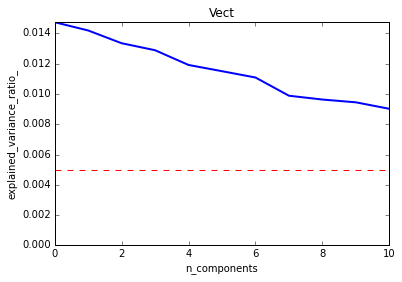


None


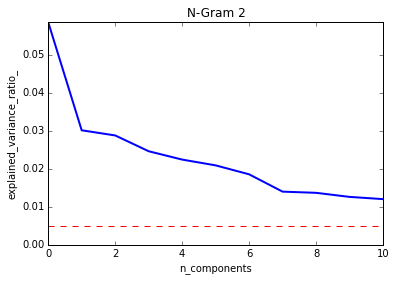


None


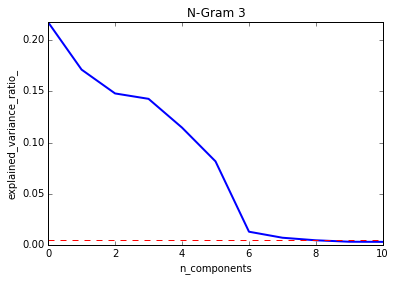


None


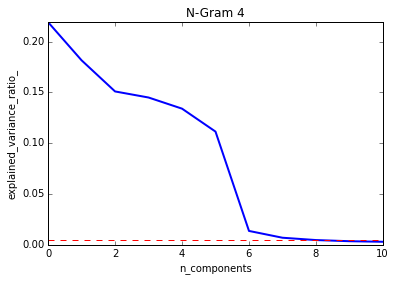


None


In [4]:
## Extract principal components , looking at variance explained of n components
# Using PCA
def getPCAPlot(X, title):
    pca = PCA()
    pca.fit(X)
    X_pca = pca.transform(X)

    # Plot the PCA spectrum
    plt.plot(pca.explained_variance_ratio_, linewidth=2)
    plt.axis('tight')
    plt.title(title)
    plt.xlabel('n_components')
    plt.ylabel('explained_variance_ratio_')
    plt.axhline(y=0.005, color="red", linestyle="--")
    plt.xlim(0,10)
    plt.show()
    print('')

# do for all data
for i in range(len(data)):
    print(getPCAPlot(data[i], titles[i]))

## results show that we need 50 components for Vect and N2 and 6 components for N3 and N4

In [5]:
## Trying n components
def getPCA(X, n=6):
    pca = PCA(n)
    pca.fit(X)
    return pca.transform(X)

### function to fit KMeans, GMM, DBSCAN
def getKM(X, k):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=10000, n_init=30)
    km.fit(X)
    klabels = km.labels_
    kcentroids = km.cluster_centers_

    ## plot K-Means
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(k):
        # plot data points
        dplt = X[np.where(klabels==i)]
        ax.plot(dplt[:,0],dplt[:,1],dplt[:,2],'o')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    plt.title('K-Means, k = ' + str(k))
    plt.show()
    return km

def getGMM(X, k):
    gmm = GMM(n_components=k, n_init=30, covariance_type='full')
    gmm.fit(X)
    glabels = gmm.predict(X)
    gmeans = gmm.means_
    gcovar = gmm.covars_

    ## plot GMM
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(k):
        # plot data points
        dplt = X[np.where(glabels==i)]
        plt.plot(dplt[:,0],dplt[:,1],dplt[:,2],'o')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    plt.title('GMM, k = ' + str(k))
    plt.show()
    return gmm

def getDBS(X):
    dbs = DBSCAN()
    dbs.fit(X)
    dlabels = dbs.labels_
    dk = dlabels.max()

    ## plot DBSCAN
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(dk):
        # plot data points
        dplt = X[np.where(dlabels==i)]
        plt.plot(dplt[:,0],dplt[:,1],dplt[:,2],'o')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    plt.title('DBSCAN, k = ' + str(dk))
    plt.show()
    return dbs



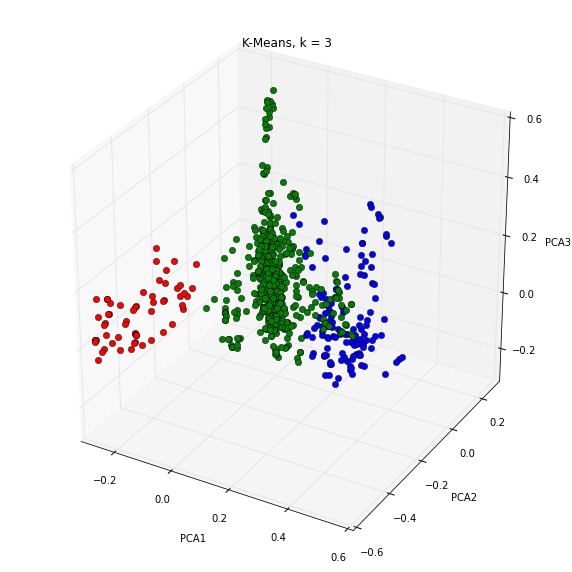

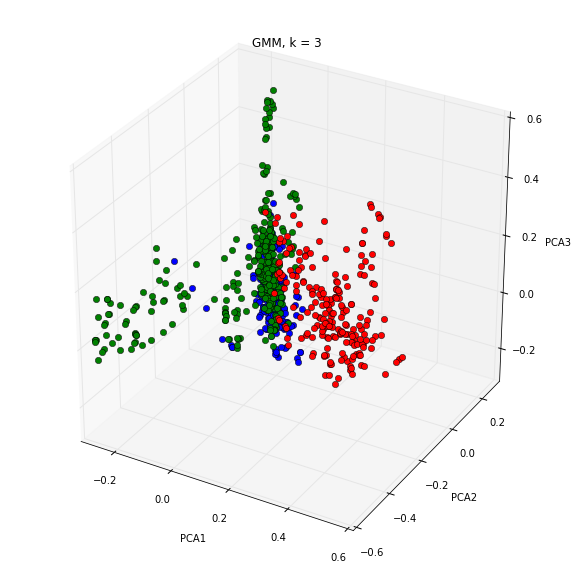

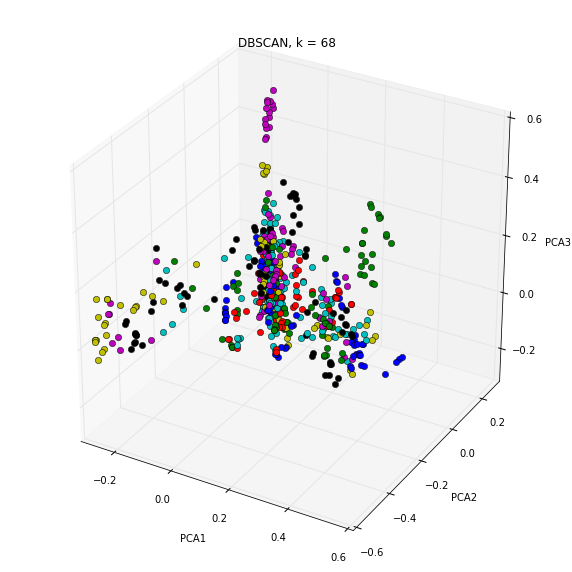

In [17]:
## look at TFIDF
for X1 in [V]:
    ### PCA
    X1 = getPCA(X1, n=100)
    k = 3

    ### K-Means cluster
    km1 = getKM(X1,k)

    ### GMM with covariance_type = full 
    gm1 = getGMM(X1,k)

    ### DBSCAN 
    dbs = getDBS(X1)


In [33]:
## list of plays that might not be Shakespeare's works using TFIDF
lkm1 = km1.predict(X1).tolist()
ix = [i for i in range(len(lkm1)) if lkm1[i] == 2]
table = pd.DataFrame([LAB[0].tolist()[x] for x in ix])
table

,0
0,cymbeline_3.0_1.0
1,cymbeline_3.0_2.0
2,antony and cleopatra_1.0_1.0
3,antony and cleopatra_1.0_2.0
4,antony and cleopatra_1.0_3.0
5,antony and cleopatra_1.0_4.0
6,antony and cleopatra_1.0_5.0
7,antony and cleopatra_2.0_1.0
8,antony and cleopatra_2.0_2.0
9,antony and cleopatra_2.0_3.0


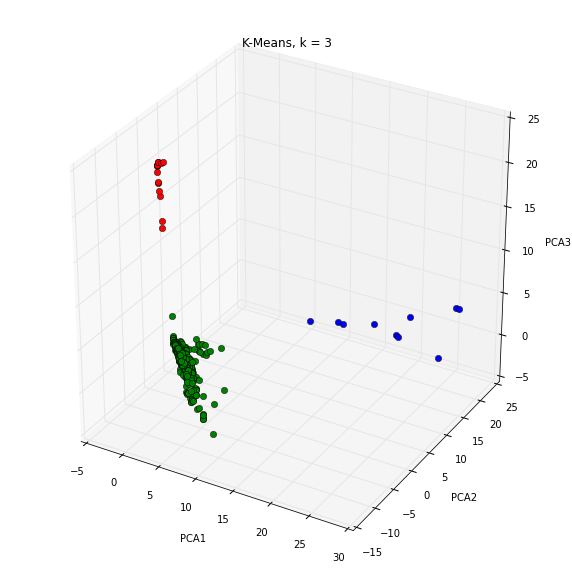

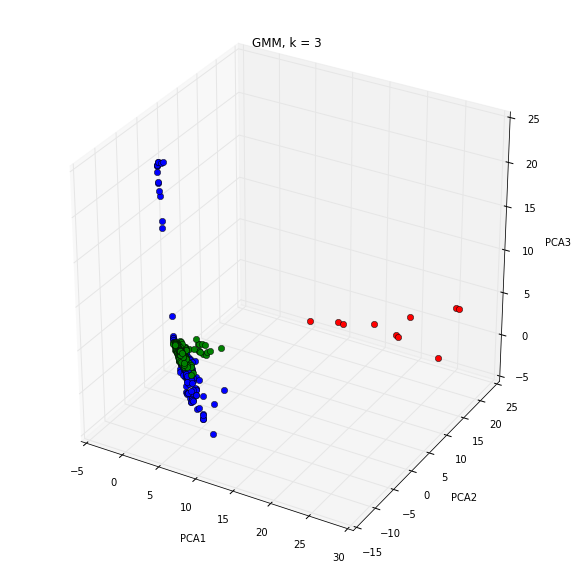

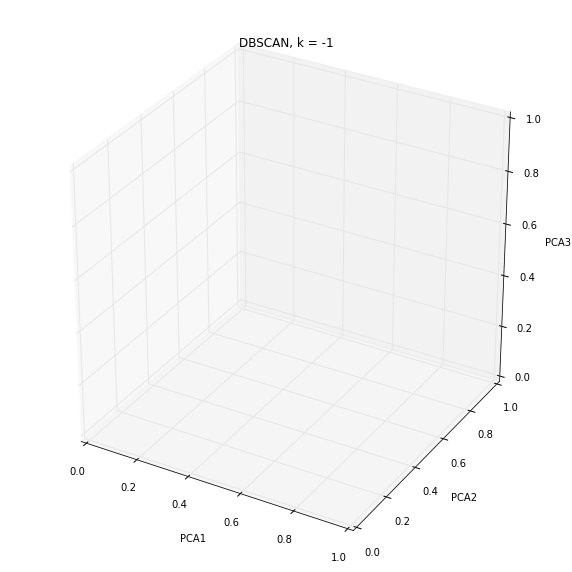

In [35]:
## look at 2-gram
for X2 in [N2]:
    ### PCA
    X2 = getPCA(X2, n=100)
    k = 3

    ### K-Means cluster
    km2 = getKM(X2,k)

    ### GMM with covariance_type = full 
    gm2 = getGMM(X2,k)

    ### DBSCAN 
    dbs = getDBS(X2)



In [39]:
## list of plays that might not be Shakespeare's works using 2-gram
lkm2 = km2.predict(X2).tolist()
ix = [i for i in range(len(lkm2)) if lkm2[i] == 0]
table = pd.DataFrame([LAB[0].tolist()[x] for x in ix])
table

,0
0,the second part of king henry the fourth_1.0_2.0
1,the second part of king henry the fourth_1.0_3.0
2,the second part of king henry the fourth_2.0_1.0
3,the second part of king henry the fourth_2.0_2.0
4,the second part of king henry the fourth_2.0_3.0
5,the second part of king henry the fourth_2.0_4.0
6,the second part of king henry the fourth_5.0_2.0
7,the second part of king henry the fourth_5.0_3.0
8,the second part of king henry the fourth_5.0_4.0
9,the second part of king henry the fourth_5.0_5.0


In [38]:
## list of plays that might not be Shakespeare's works using 2-gram
lkm2 = km2.predict(X2).tolist()
ix = [i for i in range(len(lkm2)) if lkm2[i] == 2]
table = pd.DataFrame([LAB[0].tolist()[x] for x in ix])
table

,0
0,antony and cleopatra_4.0_2.0
1,antony and cleopatra_4.0_3.0
2,antony and cleopatra_4.0_4.0
3,antony and cleopatra_4.0_5.0
4,antony and cleopatra_4.0_6.0
5,antony and cleopatra_4.0_7.0
6,antony and cleopatra_4.0_8.0
7,antony and cleopatra_4.0_9.0
8,antony and cleopatra_4.0_10.0
9,antony and cleopatra_4.0_11.0


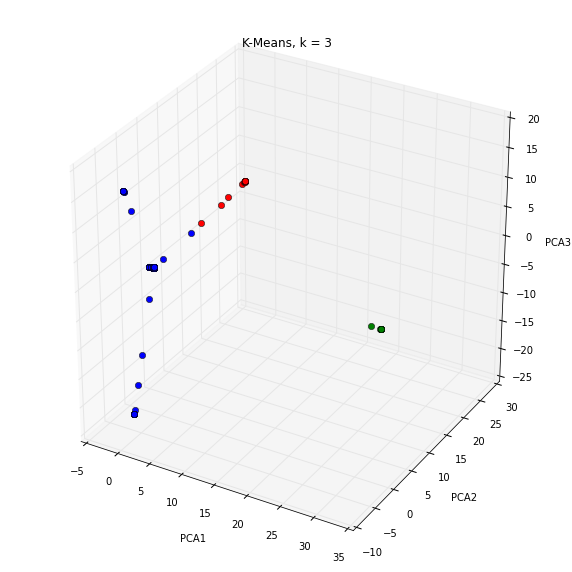

KMeans(copy_x=True, init='k-means++', max_iter=10000, n_clusters=3, n_init=30,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


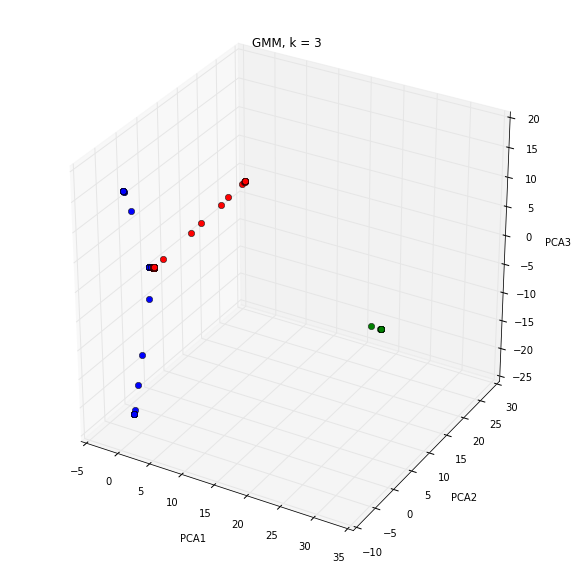

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=30, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


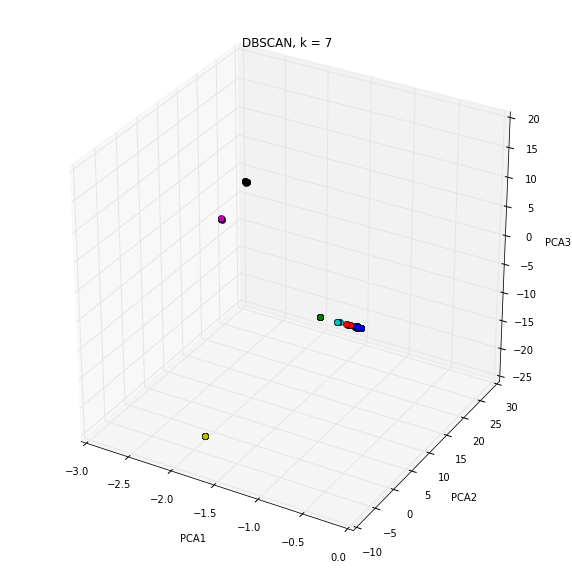

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=None)


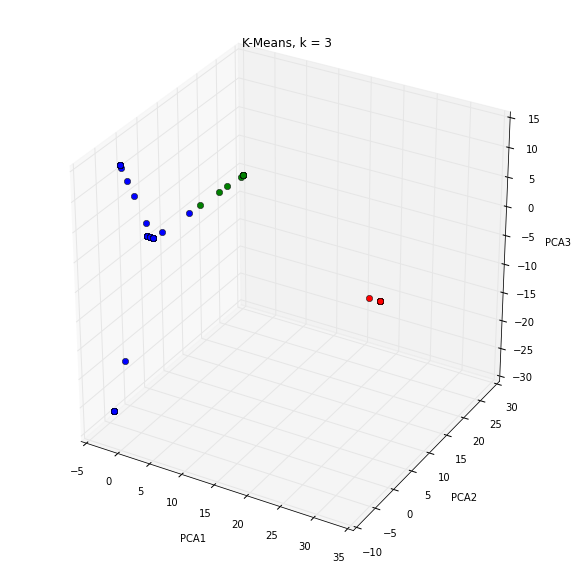

KMeans(copy_x=True, init='k-means++', max_iter=10000, n_clusters=3, n_init=30,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


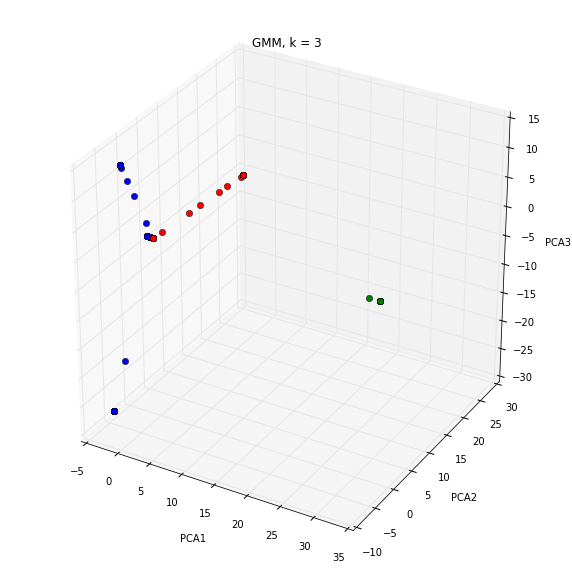

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=30, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


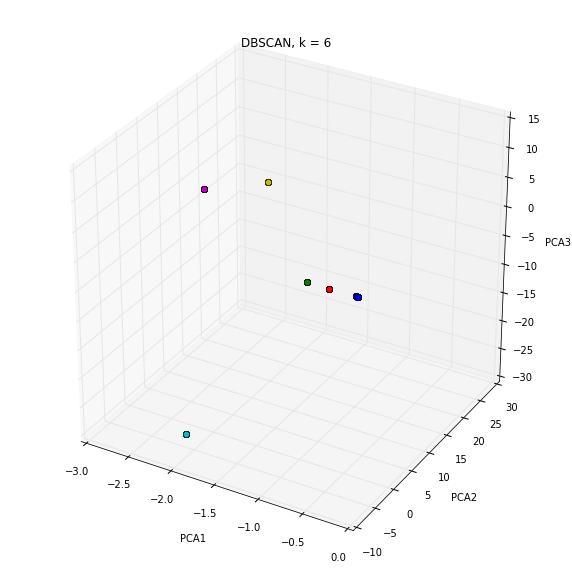

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=None)


In [11]:
## look at N3 and N4
for X in [N3, N4]:
    ### PCA
    X = getPCA(X, n=6)
    k = 3

    ### K-Means cluster
    print(getKM(X,k))

    ### GMM with covariance_type = full 
    print(getGMM(X,k))

    ### DBSCAN 
    print(getDBS(X))

